## Predictors of Bivalent Vaccine Uptake at the County Level

In this notebook, we look at the avaialability of vaccination clinics and compare it COVID bivalent vaccine uptake within each of the U.S. counties.

In [446]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import geopandas as gpd
import statsmodels.formula.api as sm

In [447]:
date_list = ["02/01/2023"]
year_list = [2020]

In [448]:
states_ab_list = [
    "AL",
    # "AK",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DE",
    "FL",
    "GA",
    # "HI",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

In [449]:
states_fips_list = [
    "01",
    # "02",
    "04",
    "05",
    "06",
    "08",
    "09",
    "10",
    "11",
    "12",
    "13",
    # "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
    "29",
    "30",
    "31",
    "32",
    "33",
    "34",
    "35",
    "36",
    "37",
    "38",
    "39",
    "40",
    "41",
    "42",
    "44",
    "45",
    "46",
    "47",
    "48",
    "49",
    "50",
    "51",
    "53",
    "54",
    "55",
    "56",
]

In [450]:
fips_to_state = {
    "01": "AL",
    "02": "AK",
    "04": "AZ",
    "05": "AR",
    "06": "CA",
    "08": "CO",
    "09": "CT",
    "10": "DE",
    "11": "DC",
    "12": "FL",
    "13": "GA",
    "15": "HI",
    "16": "ID",
    "17": "IL",
    "18": "IN",
    "19": "IA",
    "20": "KS",
    "21": "KY",
    "22": "LA",
    "23": "ME",
    "24": "MD",
    "25": "MA",
    "26": "MI",
    "27": "MN",
    "28": "MS",
    "29": "MO",
    "30": "MT",
    "31": "NE",
    "32": "NV",
    "33": "NH",
    "34": "NJ",
    "35": "NM",
    "36": "NY",
    "37": "NC",
    "38": "ND",
    "39": "OH",
    "40": "OK",
    "41": "OR",
    "42": "PA",
    "44": "RI",
    "45": "SC",
    "46": "SD",
    "47": "TN",
    "48": "TX",
    "49": "UT",
    "50": "VT",
    "51": "VA",
    "53": "WA",
    "54": "WV",
    "55": "WI",
    "56": "WY",
}

In [451]:
states_to_abv = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

In [452]:
ipums_to_demo = {
    "GEOID": "GEOID",
    "ALT0E001": "total_age",
    "ALT0E002": "male",
    "ALT0E003": "male_under_5",
    "ALT0E004": "male_5_to_9",
    "ALT0E005": "male_10_to_14",
    "ALT0E006": "male_15_to_17",
    "ALT0E007": "male_18_and_19",
    "ALT0E008": "male_20",
    "ALT0E009": "male_21",
    "ALT0E010": "male_22_to_24",
    "ALT0E011": "male_25_to_29",
    "ALT0E012": "male_30_to_34",
    "ALT0E013": "male_35_to_39",
    "ALT0E014": "male_40_to_44",
    "ALT0E015": "male_45_to_49",
    "ALT0E016": "male_50_to_54",
    "ALT0E017": "male_55_to_59",
    "ALT0E018": "male_60_and_61",
    "ALT0E019": "male_62_to_64",
    "ALT0E020": "male_65_and_66",
    "ALT0E021": "male_67_to_69",
    "ALT0E022": "male_70_to_74",
    "ALT0E023": "male_75_to_79",
    "ALT0E024": "male_80_to_84",
    "ALT0E025": "male_85_years_and_over",
    "ALT0E026": "female",
    "ALT0E027": "female_under_5",
    "ALT0E028": "female_5_to 9",
    "ALT0E029": "female_10_to 14",
    "ALT0E030": "female_15_to 17",
    "ALT0E031": "female_18_and 19",
    "ALT0E032": "female_20",
    "ALT0E033": "female_21",
    "ALT0E034": "female_22_to_24",
    "ALT0E035": "female_25_to_29",
    "ALT0E036": "female_30_to_34",
    "ALT0E037": "female_35_to_39",
    "ALT0E038": "female_40_to_44",
    "ALT0E039": "female_45_to_49",
    "ALT0E040": "female_50_to_54",
    "ALT0E041": "female_55_to_59",
    "ALT0E042": "female_60_and_61",
    "ALT0E043": "female_62_to_64",
    "ALT0E044": "female_65_and_66",
    "ALT0E045": "female_67_to_69",
    "ALT0E046": "female_70_to_74",
    "ALT0E047": "female_75_to_79",
    "ALT0E048": "female_80_to_84",
    "ALT0E049": "female_85_years_and_over",
    "ALUCE001": "total_race",
    "ALUCE002": "white_alone",
    "ALUCE003": "black_or_african_american_alone",
    "ALUCE004": "american_indian_and_alaska_native_alone",
    "ALUCE005": "asian_alone",
    "ALUCE006": "native_hawaiian_and_other_pacific_islander_alone",
    "ALUCE007": "some_other_race_alone",
    "ALUCE008": "two_or_more_races",
    "ALUCE009": "two_or_more_races_two_races_including_some_other_race",
    "ALUCE010": "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALUKE001": "total_hispanic",
    "ALUKE002": "not_hispanic_or_latino",
    "ALUKE003": "not_hispanic_or_latino_white_alone",
    "ALUKE004": "not_hispanic_or_latino_black_or_african_american_alone",
    "ALUKE005": "not_hispanic_or_latino_american_indian_and_alaska_native_alone",
    "ALUKE006": "not_hispanic_or_latino_asian_alone",
    "ALUKE007": "not_hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "ALUKE008": "not_hispanic_or_latino_some_other_race_alone",
    "ALUKE009": "not_hispanic_or_latino_two_or_more_races",
    "ALUKE010": "not_hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "ALUKE011": "not_hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALUKE012": "hispanic_or_latino",
    "ALUKE013": "hispanic_or_latino_white_alone",
    "ALUKE014": "hispanic_or_latino_black_or_african_american_alone",
    "ALUKE015": "hispanic_or_latino_american_indian_and_alaska_native_alone",
    "ALUKE016": "hispanic_or_latino_asian_alone",
    "ALUKE017": "hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "ALUKE018": "hispanic_or_latino_some_other_race_alone",
    "ALUKE019": "hispanic_or_latino_two_or_more_races",
    "ALUKE020": "hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "ALUKE021": "hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALWGE001": "total_education",
    "ALWGE002": "no_schooling_completed",
    "ALWGE003": "nursery_school",
    "ALWGE004": "kindergarten",
    "ALWGE005": "1st_grade",
    "ALWGE006": "2nd_grade",
    "ALWGE007": "3rd_grade",
    "ALWGE008": "4th_grade",
    "ALWGE009": "5th_grade",
    "ALWGE010": "6th_grade",
    "ALWGE011": "7th_grade",
    "ALWGE012": "8th_grade",
    "ALWGE013": "9th_grade",
    "ALWGE014": "10th_grade",
    "ALWGE015": "11th_grade",
    "ALWGE016": "12th_grade_no_diploma",
    "ALWGE017": "regular_high_school_diploma",
    "ALWGE018": "GED_or_alternative_credential",
    "ALWGE019": "some_college_less_than_1_year",
    "ALWGE020": "some_college_1_or_more_years_no degree",
    "ALWGE021": "associate_degree",
    "ALWGE022": "bachelor_degree",
    "ALWGE023": "master_degree",
    "ALWGE024": "professional_school_degree",
    "ALWGE025": "doctorate_degree",
    "ALW1E001": "median_household_income_in_the_past_12_months",
}

In [453]:
age_demo = [
    "male",
    "male_under_5",
    "male_5_to_9",
    "male_10_to_14",
    "male_15_to_17",
    "male_18_and_19",
    "male_20",
    "male_21",
    "male_22_to_24",
    "male_25_to_29",
    "male_30_to_34",
    "male_35_to_39",
    "male_40_to_44",
    "male_45_to_49",
    "male_50_to_54",
    "male_55_to_59",
    "male_60_and_61",
    "male_62_to_64",
    "male_65_and_66",
    "male_67_to_69",
    "male_70_to_74",
    "male_75_to_79",
    "male_80_to_84",
    "male_85_years_and_over",
    "female",
    "female_under_5",
    "female_5_to 9",
    "female_10_to 14",
    "female_15_to 17",
    "female_18_and 19",
    "female_20",
    "female_21",
    "female_22_to_24",
    "female_25_to_29",
    "female_30_to_34",
    "female_35_to_39",
    "female_40_to_44",
    "female_45_to_49",
    "female_50_to_54",
    "female_55_to_59",
    "female_60_and_61",
    "female_62_to_64",
    "female_65_and_66",
    "female_67_to_69",
    "female_70_to_74",
    "female_75_to_79",
    "female_80_to_84",
    "female_85_years_and_over",
]

In [454]:
race_demo = [
    "white_alone",
    "black_or_african_american_alone",
    "american_indian_and_alaska_native_alone",
    "asian_alone",
    "native_hawaiian_and_other_pacific_islander_alone",
    "some_other_race_alone",
    "two_or_more_races",
    "two_or_more_races_two_races_including_some_other_race",
    "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
]

In [455]:
hispanic_demo = [
    "not_hispanic_or_latino",
    "not_hispanic_or_latino_white_alone",
    "not_hispanic_or_latino_black_or_african_american_alone",
    "not_hispanic_or_latino_american_indian_and_alaska_native_alone",
    "not_hispanic_or_latino_asian_alone",
    "not_hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "not_hispanic_or_latino_some_other_race_alone",
    "not_hispanic_or_latino_two_or_more_races",
    "not_hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "not_hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
    "hispanic_or_latino",
    "hispanic_or_latino_white_alone",
    "hispanic_or_latino_black_or_african_american_alone",
    "hispanic_or_latino_american_indian_and_alaska_native_alone",
    "hispanic_or_latino_asian_alone",
    "hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "hispanic_or_latino_some_other_race_alone",
    "hispanic_or_latino_two_or_more_races",
    "hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
]

In [456]:
education_demo = [
    "no_schooling_completed",
    "nursery_school",
    "kindergarten",
    "1st_grade",
    "2nd_grade",
    "3rd_grade",
    "4th_grade",
    "5th_grade",
    "6th_grade",
    "7th_grade",
    "8th_grade",
    "9th_grade",
    "10th_grade",
    "11th_grade",
    "12th_grade_no_diploma",
    "regular_high_school_diploma",
    "GED_or_alternative_credential",
    "some_college_less_than_1_year",
    "some_college_1_or_more_years_no degree",
    "associate_degree",
    "bachelor_degree",
    "master_degree",
    "professional_school_degree",
    "doctorate_degree",
]

### import datasets

In [457]:
# import vaccine dataset from: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh

vaccinations_raw = pd.read_csv(
    "../../data/county_level/COVID-19_Vaccinations_in_the_United_States_County.csv"
)

In [458]:
# import flu locations dataset from: https://data.cdc.gov/Flu-Vaccinations/Vaccines-gov-Flu-vaccinating-provider-locations/bugr-bbfr

flu_locations_raw = pd.read_csv(
    "../../data/county_level/Vaccines.gov__Flu_vaccinating_provider_locations.csv"
)

/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_31181/1755238248.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  flu_locations_raw = pd.read_csv(


In [459]:
# import covid locations dataset from: https://data.cdc.gov/Vaccinations/Vaccines-gov-COVID-19-vaccinating-provider-locatio/5jp2-pgaw

covid_locations_raw = pd.read_csv(
    "../../data/county_level/Vaccines.gov__COVID-19_vaccinating_provider_locations.csv"
)

In [460]:
# import voting data from: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

voting_raw = pd.read_csv("../../data/county_level/countypres_2000-2020.csv")

In [461]:
# import demographic data from: https://usa.ipums.org/usa/index.shtml

demographics_raw = pd.read_csv(
    "../../data/county_level/nhgis0004_ds244_20195_county.csv", encoding="latin-1"
)

In [462]:
# import county-level shp files from: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

us_map = gpd.read_file("../../data/map/usa/cb_2018_us_county_500k.shp")
alaska_map = gpd.read_file("../../data/map/alaska/tl_2018_02_cousub.shp")
hawaii_map = gpd.read_file("../../data/map/hawaii/tl_2016_15_cousub.shp")

### data cleaning and manipulation

##### locations

In [463]:
# filter out locations with vaccines in stock

flu_locations_stock = flu_locations_raw.loc[flu_locations_raw.in_stock == True]
covid_locations_stock = covid_locations_raw.loc[covid_locations_raw.in_stock == True]

In [464]:
# drop duplicates from location datasets

flu_locations_dedup = flu_locations_stock.drop_duplicates(
    subset=["latitude", "longitude"], keep="first"
)
covid_locations_dedup = covid_locations_stock.drop_duplicates(
    subset=["latitude", "longitude"], keep="first"
)

In [465]:
# exclude all locations outside 50 U.S. states

flu_locations_states = flu_locations_dedup[
    flu_locations_dedup["loc_admin_state"].isin(states_ab_list)
]
covid_locations_states = covid_locations_dedup[
    covid_locations_dedup["loc_admin_state"].isin(states_ab_list)
]

In [466]:
locations_cols_names = ["loc_name", "loc_admin_state", "latitude", "longitude"]

In [467]:
# filter column headers in locations datasets

flu_centers = flu_locations_states.loc[
    :, flu_locations_states.columns.isin(locations_cols_names)
]
covid_centers = covid_locations_states.loc[
    :, covid_locations_states.columns.isin(locations_cols_names)
]

In [468]:
# designate whether locations are flu-only, covid-only, or both

flu_centers.insert(0, "center", "flu")
covid_centers.insert(0, "center", "covid")

merged_centers = pd.merge(
    flu_centers,
    covid_centers,
    on=["latitude", "longitude"],
    how="outer",
    indicator=True,
)

merged_centers["center"] = merged_centers["_merge"].map(
    {"left_only": "flu", "right_only": "covid", "both": "both"}
)

merged_centers = merged_centers.loc[:, ["latitude", "longitude", "center"]]

In [469]:
# how many immunization centers total

len(merged_centers)

50162

In [470]:
# sanity check to validate number of centers and respective labels

(
    len(merged_centers.loc[merged_centers.center == "both"])
    + len(merged_centers.loc[merged_centers.center == "covid"])
    + len(merged_centers.loc[merged_centers.center == "flu"])
)

50162

In [471]:
# how many centers labeled as "both"

len(merged_centers.loc[merged_centers.center == "both"])

29420

In [472]:
# how many centers labeled as "covid only"

len(merged_centers.loc[merged_centers.center == "covid"])

19198

In [473]:
# how many centers labeled as "flu only"

len(merged_centers.loc[merged_centers.center == "flu"])

1544

In [474]:
# create geodataframe with lat / long coordinates

gdf = gpd.GeoDataFrame(
    merged_centers,
    geometry=gpd.points_from_xy(merged_centers.longitude, merged_centers.latitude),
)

gdf = gdf.set_crs("epsg:4269")

centers = gdf.sjoin(us_map)

In [475]:
centers.head(1)

,latitude,longitude,center,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,34.008567,-96.382197,both,POINT (-96.38220 34.00857),518,40,013,01101794,0500000US40013,40013,Bryan,06,2342666324,102129113


In [476]:
grouped_centers = centers.groupby(["GEOID"])
grouped_centers = pd.DataFrame(
    {
        "covid_only": grouped_centers.apply(lambda x: (x["center"] == "covid").sum()),
        "both": grouped_centers.apply(lambda x: (x["center"] == "both").sum()),
        "total_centers": grouped_centers.apply(lambda x: x.shape[0]),
    }
)

grouped_centers = grouped_centers.reset_index()

In [477]:
grouped_centers

,GEOID,covid_only,both,total_centers
0,01001,2,4,6
1,01003,8,29,39
2,01005,3,2,5
3,01007,5,1,7
4,01009,4,3,7
...,...,...,...,...
2808,56037,2,5,7
2809,56039,2,1,4
2810,56041,3,3,6
2811,56043,2,0,2


##### vaccinations

In [478]:
# filter vaccination data to only U.S. 50 states and date

vaccinations = vaccinations_raw.loc[
    vaccinations_raw.Date.isin(date_list)
    & vaccinations_raw.Recip_State.isin(states_ab_list)
].reset_index(drop=True)

vaccinations = vaccinations[vaccinations.FIPS != "UNK"]

In [479]:
# how many counties are missing vaccine data

null_vaccinations = vaccinations[vaccinations["Bivalent_Booster_5Plus"].isnull()]
len(null_vaccinations)

11

In [480]:
# filter and rename vaccination dataset column headers

vaccinations_col_map = {
    "FIPS": "GEOID",
    "Census2019": "census_2019",
    "Series_Complete_5Plus": "series_complete_5plus",
    "Series_Complete_12Plus": "series_complete_12plus",
    "Series_Complete_18Plus": "series_complete_18plus",
    "Series_Complete_65Plus": "series_complete_65plus",
    "Bivalent_Booster_5Plus": "bivalent_5plus",
    "Bivalent_Booster_12Plus": "bivalent_12plus",
    "Bivalent_Booster_18Plus": "bivalent_18plus",
    "Bivalent_Booster_65Plus": "bivalent_65plus",
    "Bivalent_Booster_5Plus_Pop_Pct": "bivalent_5plus_pct",
    "Bivalent_Booster_12Plus_Pop_Pct": "bivalent_12plus_pct",
    "Bivalent_Booster_18Plus_Pop_Pct": "bivalent_18plus_pct",
    "Bivalent_Booster_65Plus_Pop_Pct": "bivalent_65plus_pct",
}

vaccinations = vaccinations.rename(columns=vaccinations_col_map)

vaccinations = vaccinations.filter(vaccinations_col_map.values())

In [481]:
# calculate proportion of those vaccinated with bivalent and eligible as well as eligible per 100,000

vaccinations["bivalent_5plus_pct_elig"] = (
    vaccinations.bivalent_5plus / vaccinations.series_complete_5plus
)
vaccinations["bivalent_12plus_pct_elig"] = (
    vaccinations.bivalent_12plus / vaccinations.series_complete_12plus
)
vaccinations["bivalent_18plus_pct_elig"] = (
    vaccinations.bivalent_18plus / vaccinations.series_complete_18plus
)
vaccinations["bivalent_65plus_pct_elig"] = (
    vaccinations.bivalent_65plus / vaccinations.series_complete_65plus
)

vaccinations["bivalent_5plus_pct_elig_100k"] = (
    vaccinations.bivalent_5plus / vaccinations.series_complete_5plus
) * 100000
vaccinations["bivalent_12plus_pct_elig_100k"] = (
    vaccinations.bivalent_12plus / vaccinations.series_complete_12plus
) * 100000
vaccinations["bivalent_18plus_pct_elig_100k"] = (
    vaccinations.bivalent_18plus / vaccinations.series_complete_18plus
) * 100000
vaccinations["bivalent_65plus_pct_elig_100k"] = (
    vaccinations.bivalent_65plus / vaccinations.series_complete_65plus
) * 100000

In [482]:
vaccinations

,GEOID,census_2019,series_complete_5plus,series_complete_12plus,series_complete_18plus,series_complete_65plus,bivalent_5plus,bivalent_12plus,bivalent_18plus,bivalent_65plus,...,bivalent_18plus_pct,bivalent_65plus_pct,bivalent_5plus_pct_elig,bivalent_12plus_pct_elig,bivalent_18plus_pct_elig,bivalent_65plus_pct_elig,bivalent_5plus_pct_elig_100k,bivalent_12plus_pct_elig_100k,bivalent_18plus_pct_elig_100k,bivalent_65plus_pct_elig_100k
0,01125,209355.0,94870.0,92677.0,87313.0,22968.0,13258.0,13204.0,12922.0,6782.0,...,7.8,23.6,0.139749,0.142473,0.147996,0.295280,13974.913039,14247.332132,14799.628921,29528.039011
1,27101,8194.0,4631.0,4479.0,4251.0,1745.0,1473.0,1464.0,1444.0,1004.0,...,22.4,47.1,0.318074,0.326859,0.339685,0.575358,31807.385014,32685.867381,33968.478005,57535.816619
2,49029,12124.0,6788.0,6452.0,5669.0,1355.0,1145.0,1120.0,1061.0,544.0,...,13.4,37.6,0.168680,0.173590,0.187158,0.401476,16868.002357,17358.958462,18715.822896,40147.601476
3,45061,16828.0,8386.0,8188.0,7705.0,2682.0,1081.0,1076.0,1062.0,682.0,...,7.9,20.6,0.128905,0.131412,0.137833,0.254288,12890.531839,13141.182218,13783.257625,25428.784489
4,38065,1959.0,526.0,517.0,492.0,224.0,125.0,124.0,121.0,84.0,...,8.3,18.9,0.237643,0.239845,0.245935,0.375000,23764.258555,23984.526112,24593.495935,37500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,12109,264672.0,191749.0,184493.0,170314.0,55477.0,36865.0,36306.0,35280.0,20653.0,...,17.0,37.8,0.192257,0.196788,0.207147,0.372280,19225.654371,19678.795401,20714.679944,37228.040449
3151,54005,21457.0,10435.0,10282.0,9624.0,3400.0,1725.0,1715.0,1692.0,983.0,...,9.9,21.9,0.165309,0.166796,0.175810,0.289118,16530.905606,16679.634312,17581.047382,28911.764706
3152,19083,16846.0,9607.0,9376.0,8982.0,3423.0,2664.0,2650.0,2614.0,1813.0,...,19.3,47.7,0.277298,0.282637,0.291026,0.529652,27729.780368,28263.651877,29102.649744,52965.235174
3153,46047,6713.0,4338.0,4292.0,4186.0,2055.0,986.0,978.0,968.0,686.0,...,17.3,34.2,0.227294,0.227866,0.231247,0.333820,22729.368373,22786.579683,23124.701386,33381.995134


##### voting

In [483]:
# filter voting datast to U.S. 50 states and calcualte proportion of county voting for Biden or Trump

voting_filter = voting_raw.loc[
    voting_raw.year.isin(year_list) & voting_raw.state_po.isin(states_ab_list)
].reset_index(drop=True)

voting_filter["vote_pct"] = (
    voting_filter.candidatevotes / voting_filter.totalvotes
) * 100

voting_filter = voting_filter.rename(columns={"county_fips": "GEOID"})

In [484]:
# reshaping voting dataset

voting_pivot = pd.pivot_table(
    voting_filter, values="vote_pct", index="GEOID", columns="candidate", fill_value=0
).reset_index()

voting = voting_pivot.rename(
    columns={
        "DONALD J TRUMP": "trump",
        "JOSEPH R BIDEN JR": "biden",
        "JO JORGENSEN": "jorgensen",
        "OTHER": "other",
    }
)

voting.columns.name = None

In [485]:
# fix the geo ids in the dataset to object form

voting["GEOID"] = voting["GEOID"].astype(str).str.split(".", n=1).str[0]


def add_zero(x):
    if len(x) == 4:
        return "0" + x
    else:
        return x


voting["GEOID"] = voting["GEOID"].apply(add_zero)

In [486]:
voting

,GEOID,trump,jorgensen,biden,other
0,01001,71.436802,0.000000,27.018365,1.544833
1,01003,76.171373,0.000000,22.409030,1.419597
2,01005,53.451226,0.000000,45.788173,0.760601
3,01007,78.426264,0.000000,20.698280,0.875456
4,01009,89.571553,0.000000,9.569378,0.859069
...,...,...,...,...,...
3103,56037,73.236316,2.096059,22.894957,1.772667
3104,56039,29.356868,1.724488,66.599040,2.319605
3105,56041,79.247278,1.818374,16.819960,2.114388
3106,56043,80.481151,1.612103,16.145833,1.760913


##### demographics

In [487]:
demographics_raw["GEOID"] = demographics_raw["GEOID"].str.replace("05000US", "")
demographics_filter = demographics_raw.loc[demographics_raw.STUSAB.isin(states_ab_list)]
demographics = demographics_filter.rename(columns=ipums_to_demo)
demographics = demographics.filter(ipums_to_demo.values())

In [488]:
# calculate proportions for each demographic variable (i.e., % of county idenitfying as White)

demographics[age_demo] = (
    demographics[age_demo].div(demographics.total_age, axis=0)
) * 100
demographics[race_demo] = (
    demographics[race_demo].div(demographics.total_race, axis=0)
) * 100
demographics[hispanic_demo] = (
    demographics[hispanic_demo].div(demographics.total_hispanic, axis=0)
) * 100
demographics[education_demo] = (
    demographics[education_demo].div(demographics.total_education, axis=0)
) * 100

In [489]:
# simplify race as white vs none white

white = ["white_alone"]

non_white = [
    "black_or_african_american_alone",
    "american_indian_and_alaska_native_alone",
    "asian_alone",
    "native_hawaiian_and_other_pacific_islander_alone",
    "some_other_race_alone",
]

demographics["white"] = demographics.loc[:, white].sum(axis=1)
demographics["non_white"] = demographics.loc[:, non_white].sum(axis=1)

In [490]:
# simplify age as below or above 60 years old

age_over_60 = [
    "male_60_and_61",
    "male_62_to_64",
    "male_65_and_66",
    "male_67_to_69",
    "male_70_to_74",
    "male_75_to_79",
    "male_80_to_84",
    "male_85_years_and_over",
    "female_60_and_61",
    "female_62_to_64",
    "female_65_and_66",
    "female_67_to_69",
    "female_70_to_74",
    "female_75_to_79",
    "female_80_to_84",
    "female_85_years_and_over",
]

age_under_60 = [
    "male_under_5",
    "male_5_to_9",
    "male_10_to_14",
    "male_15_to_17",
    "male_18_and_19",
    "male_20",
    "male_21",
    "male_22_to_24",
    "male_25_to_29",
    "male_30_to_34",
    "male_35_to_39",
    "male_40_to_44",
    "male_45_to_49",
    "male_50_to_54",
    "male_55_to_59",
    "female_under_5",
    "female_5_to 9",
    "female_10_to 14",
    "female_15_to 17",
    "female_18_and 19",
    "female_20",
    "female_21",
    "female_22_to_24",
    "female_25_to_29",
    "female_30_to_34",
    "female_35_to_39",
    "female_40_to_44",
    "female_45_to_49",
    "female_50_to_54",
    "female_55_to_59",
]

demographics["over_60"] = demographics.loc[:, age_over_60].sum(axis=1)
demographics["under_60"] = demographics.loc[:, age_under_60].sum(axis=1)

In [491]:
# simplify education as either with or without bachelor's degree

bachelor_degree_minus = [
    "no_schooling_completed",
    "nursery_school",
    "kindergarten",
    "1st_grade",
    "2nd_grade",
    "3rd_grade",
    "4th_grade",
    "5th_grade",
    "6th_grade",
    "7th_grade",
    "8th_grade",
    "9th_grade",
    "10th_grade",
    "11th_grade",
    "12th_grade_no_diploma",
    "regular_high_school_diploma",
    "GED_or_alternative_credential",
    "some_college_less_than_1_year",
    "some_college_1_or_more_years_no degree",
    "associate_degree",
]
bachelor_degree_plus = [
    "bachelor_degree",
    "master_degree",
    "professional_school_degree",
    "doctorate_degree",
]

demographics["degree"] = demographics.loc[:, bachelor_degree_plus].sum(axis=1)
demographics["no_degree"] = demographics.loc[:, bachelor_degree_minus].sum(axis=1)

In [492]:
demographics

,GEOID,total_age,male,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_and_19,male_20,male_21,...,master_degree,professional_school_degree,doctorate_degree,median_household_income_in_the_past_12_months,white,non_white,over_60,under_60,degree,no_degree
0,01001,55380,48.634886,3.131094,3.887685,2.986638,2.219213,1.220657,0.604912,0.588660,...,7.693955,1.335403,1.434421,58731,76.791260,21.045504,19.902492,80.097508,26.571574,73.428426
1,01003,212830,48.628483,2.794719,2.623220,3.624019,2.022271,1.052013,0.543157,0.406428,...,7.816719,1.927047,1.074038,58320,86.205422,12.108255,27.178029,72.821971,31.862460,68.137540
2,01005,25361,52.919838,2.744371,2.858720,3.036158,1.853239,1.013367,1.194748,0.532313,...,2.755511,0.712536,0.501002,32525,46.800205,52.001104,25.022673,74.977327,11.578713,88.421287
3,01007,22493,54.016805,3.116525,2.996488,2.791980,2.667497,1.066999,0.333437,0.231183,...,3.018308,0.494805,0.414399,47542,76.788334,22.584804,22.442538,77.557462,10.378525,89.621475
4,01009,57681,49.401016,3.033928,3.006189,3.626844,2.168825,1.260380,0.310327,0.714273,...,3.500792,0.668493,0.299063,49358,95.459510,2.952445,24.505470,75.494530,13.093413,86.906587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,43521,51.632545,3.653409,3.867099,3.855610,2.235702,1.700329,0.574435,0.489419,...,5.589729,1.273156,0.844003,74843,93.384803,4.347327,17.759243,82.240757,22.498391,77.501609
3138,56039,23280,52.942440,3.045533,4.136598,2.766323,1.112543,0.906357,0.532646,0.691581,...,13.848641,2.314842,1.893436,84678,89.282646,10.064433,20.730241,79.269759,57.005138,42.994862
3139,56041,20479,50.813028,3.823429,4.770741,4.057815,2.544070,1.181698,0.229503,0.751990,...,4.296513,0.485961,0.192842,63403,93.422530,3.027492,18.741149,81.258851,16.029003,83.970997
3140,56043,8027,50.641585,3.164320,2.504049,3.662639,3.089573,0.548150,0.859599,0.548150,...,6.076451,1.568698,0.342589,54158,89.747104,6.465678,27.955650,72.044350,23.386224,76.613776


##### merge datasets and sanity checks

In [493]:
# check to see how many counties in each dataframe

dataframes = {
    "grouped_centers": grouped_centers,
    "vaccinations": vaccinations,
    "voting": voting,
    "demographics": demographics,
    "us_map": us_map,
}
for name, df in dataframes.items():
    print(name, "# of counties:", len(df))

grouped_centers # of counties: 2813
vaccinations # of counties: 3107
voting # of counties: 3108
demographics # of counties: 3107
us_map # of counties: 3233


In [494]:
# check to see if demographic and vaccination geo ids match

match = set(vaccinations["GEOID"]) == set(demographics["GEOID"])
match

True

In [495]:
# Kansas, MO is in the voting df but not the others

vaccinations_geoids = set(vaccinations["GEOID"])
voting_geoids = set(voting["GEOID"])
mismatched_geoids = vaccinations_geoids.symmetric_difference(voting_geoids)

mismatched_geoids

{'36000'}

In [496]:
# merge multiple dataframes

merged_df = (
    pd.merge(vaccinations, demographics, on="GEOID", how="left")
    .merge(voting, on="GEOID", how="left")
    .merge(grouped_centers, on="GEOID", how="left")
)

In [497]:
# fill geo ids with NaN centers with zero

merged_df[["covid_only", "both", "total_centers"]] = merged_df[
    ["covid_only", "both", "total_centers"]
].fillna(value=0)

In [498]:
# calculate centers per 100,000 people

merged_df["covid_only_100k"] = (merged_df.covid_only / merged_df.census_2019) * 100000
merged_df["both_centers_100k"] = (merged_df.both / merged_df.census_2019) * 100000
merged_df["total_centers_100k"] = (
    merged_df.total_centers / merged_df.census_2019
) * 100000

In [499]:
# take log of total centers per 100k for visualizations

merged_df["total_centers_100k_log"] = merged_df["total_centers_100k"].apply(
    lambda x: np.log(x) if x != 0 else np.nan
)

In [500]:
final_df = merged_df.copy()

In [501]:
final_df

,GEOID,census_2019,series_complete_5plus,series_complete_12plus,series_complete_18plus,series_complete_65plus,bivalent_5plus,bivalent_12plus,bivalent_18plus,bivalent_65plus,...,jorgensen,biden,other,covid_only,both,total_centers,covid_only_100k,both_centers_100k,total_centers_100k,total_centers_100k_log
0,01125,209355.0,94870.0,92677.0,87313.0,22968.0,13258.0,13204.0,12922.0,6782.0,...,0.000000,41.881072,1.430599,11.0,24.0,39.0,5.254233,11.463782,18.628645,2.924700
1,27101,8194.0,4631.0,4479.0,4251.0,1745.0,1473.0,1464.0,1444.0,1004.0,...,0.653595,29.595588,0.531046,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN
2,49029,12124.0,6788.0,6452.0,5669.0,1355.0,1145.0,1120.0,1061.0,544.0,...,0.605510,4.109900,0.338707,1.0,0.0,1.0,8.248103,0.000000,8.248103,2.109983
3,45061,16828.0,8386.0,8188.0,7705.0,2682.0,1081.0,1076.0,1062.0,682.0,...,0.140355,10.534535,0.022734,3.0,1.0,4.0,17.827430,5.942477,23.769907,3.168420
4,38065,1959.0,526.0,517.0,492.0,224.0,125.0,124.0,121.0,84.0,...,1.688555,12.101313,0.093809,1.0,0.0,1.0,51.046452,0.000000,51.046452,3.932736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,12109,264672.0,191749.0,184493.0,170314.0,55477.0,36865.0,36306.0,35280.0,20653.0,...,0.800014,36.150649,0.116916,8.0,41.0,50.0,3.022609,15.490872,18.891307,2.938702
3103,54005,21457.0,10435.0,10282.0,9624.0,3400.0,1725.0,1715.0,1692.0,983.0,...,1.353751,22.647581,0.366178,0.0,4.0,4.0,0.000000,18.641935,18.641935,2.925414
3104,19083,16846.0,9607.0,9376.0,8982.0,3423.0,2664.0,2650.0,2614.0,1813.0,...,0.584047,16.553565,0.122372,2.0,3.0,5.0,11.872255,17.808382,29.680636,3.390495
3105,46047,6713.0,4338.0,4292.0,4186.0,2055.0,986.0,978.0,968.0,686.0,...,2.746165,26.051460,0.000000,1.0,0.0,1.0,14.896470,0.000000,14.896470,2.701124


#### statistical analyses

In [502]:
# how many counties with zero covid-only centers

final_df["covid_only_100k"].value_counts()[0]

473

In [503]:
# how many counties with zero both centers

final_df["both_centers_100k"].value_counts()[0]

896

In [504]:
# vaccination ~ total centers per 100k bivarate OLS analysis

regression_centers = sm.ols(
    formula="bivalent_5plus_pct_elig_100k ~  total_centers_100k",
    data=final_df,
).fit()

print(regression_centers.summary())

                                 OLS Regression Results                                 
Dep. Variable:     bivalent_5plus_pct_elig_100k   R-squared:                       0.009
Model:                                      OLS   Adj. R-squared:                  0.009
Method:                           Least Squares   F-statistic:                     28.29
Date:                          Tue, 07 Mar 2023   Prob (F-statistic):           1.12e-07
Time:                                  22:27:24   Log-Likelihood:                -32033.
No. Observations:                          3096   AIC:                         6.407e+04
Df Residuals:                              3094   BIC:                         6.408e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [505]:
# vaccination ~ partisanship multivariable OLS analysis

regression_partisanship = sm.ols(
    formula="bivalent_5plus_pct_elig_100k ~  biden",
    data=final_df,
).fit()

print(regression_partisanship.summary())

                                 OLS Regression Results                                 
Dep. Variable:     bivalent_5plus_pct_elig_100k   R-squared:                       0.146
Model:                                      OLS   Adj. R-squared:                  0.146
Method:                           Least Squares   F-statistic:                     530.5
Date:                          Tue, 07 Mar 2023   Prob (F-statistic):          1.76e-108
Time:                                  22:27:24   Log-Likelihood:                -31802.
No. Observations:                          3096   AIC:                         6.361e+04
Df Residuals:                              3094   BIC:                         6.362e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [506]:
# multivariable OLS analysis

regression_multi = sm.ols(
    formula="bivalent_5plus_pct_elig_100k ~ total_centers_100k  + biden + male + over_60 + non_white + degree + median_household_income_in_the_past_12_months",
    data=final_df,
).fit()

print(regression_multi.summary())

                                 OLS Regression Results                                 
Dep. Variable:     bivalent_5plus_pct_elig_100k   R-squared:                       0.478
Model:                                      OLS   Adj. R-squared:                  0.477
Method:                           Least Squares   F-statistic:                     404.5
Date:                          Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                                  22:27:24   Log-Likelihood:                -31040.
No. Observations:                          3096   AIC:                         6.210e+04
Df Residuals:                              3088   BIC:                         6.214e+04
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.9

#### visualizations

In [507]:
regression_df = pd.DataFrame(
    {
        "variables": regression_multi.params.index[1:],
        "coefficient": regression_multi.params[1:],
        "std_error": regression_multi.bse[1:],
        "conf_int": (regression_multi.params - regression_multi.conf_int()[0])[1:],
        "p_value": regression_multi.pvalues[1:],
    }
)
regression_df["significant"] = regression_df["p_value"] < 0.05

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

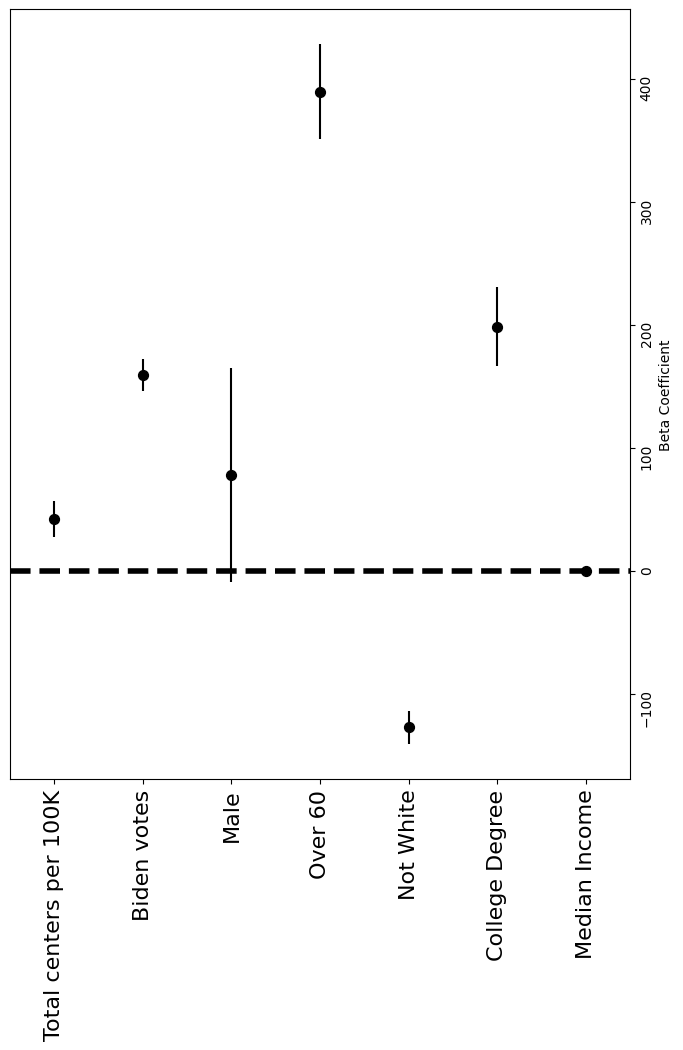

In [508]:
fig, ax = plt.subplots(figsize=(8, 10))
colors = np.where(regression_df["significant"], "red", "gray")
regression_df.plot(
    x="variables",
    y="coefficient",
    kind="bar",
    ax=ax,
    color="none",
    yerr="conf_int",
    legend=False,
)
ax.set_ylabel("Beta Coefficient")
ax.set_xlabel("")
ax.scatter(
    x=np.arange(regression_df.shape[0]),
    marker="o",
    s=50,
    y=regression_df["coefficient"],
    color="black",
)
ax.axhline(y=0, linestyle="--", color="black", linewidth=4)
ax.set_xticklabels(
    [
        "Total centers per 100K",
        "Biden votes",
        "Male",
        "Over 60",
        "Not White",
        "College Degree",
        "Median Income",
    ],
    rotation=90,
    fontsize=16,
)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.setp(ax.get_yticklabels(), rotation=90)

[Text(0.5, 1.0, 'Relationship between number of clinics and bivalent uptake')]

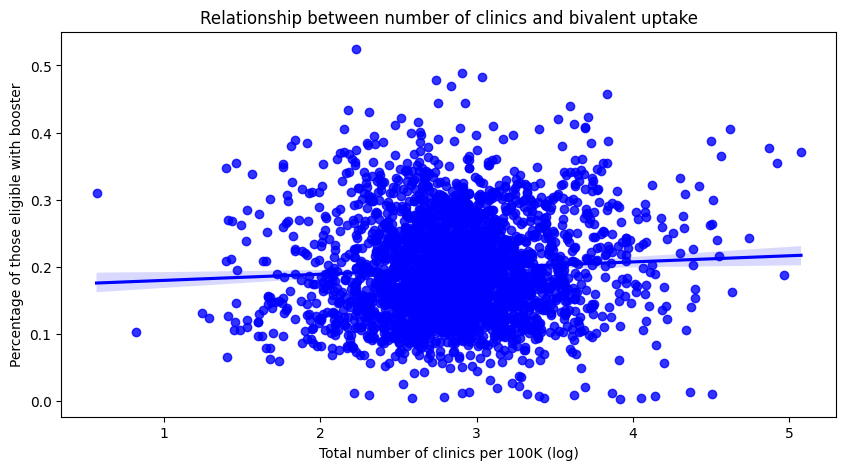

In [509]:
# graph the relationsip between clinics and bivalent uptake
## this figure does not account for any covariates

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.regplot(
    data=merged_df,
    x="total_centers_100k_log",
    y="bivalent_5plus_pct_elig",
    color="Blue",
)
ax.set(
    xlabel="Total number of clinics per 100K (log)",
    ylabel="Percentage of those eligible with booster",
)
ax.set(title="Relationship between number of clinics and bivalent uptake")

In [510]:
vaccinations_map = pd.merge(us_map, vaccinations, on="GEOID", how="left")

(22.0, 52.0)

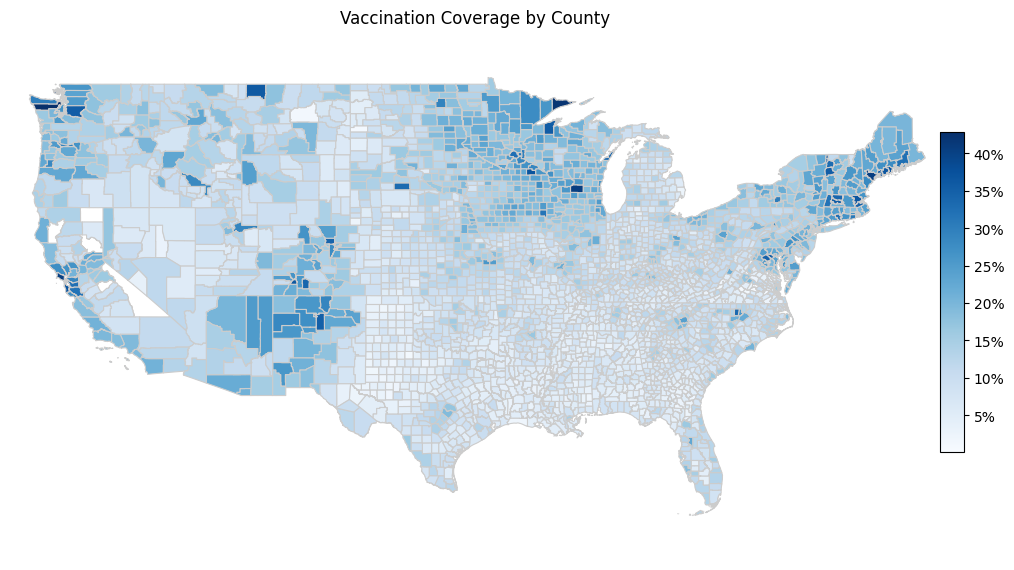

In [511]:
# plot the vaccination coverage on a map of the US

fig, ax = plt.subplots(figsize=(12, 8))
vaccinations_map.plot(
    column="bivalent_5plus_pct", cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8"
)

vmin, vmax = (
    merged_df["bivalent_5plus_pct"].min(),
    merged_df["bivalent_5plus_pct"].max(),
)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar_ax = fig.add_axes([0.9, 0.3, 0.02, 0.4])
cbar = fig.colorbar(sm, cax=cbar_ax, format="%d%%")

ax.set_title("Vaccination Coverage by County")
ax.set_axis_off()

ax.set_xlim([-126, -66])
ax.set_ylim([22, 52])

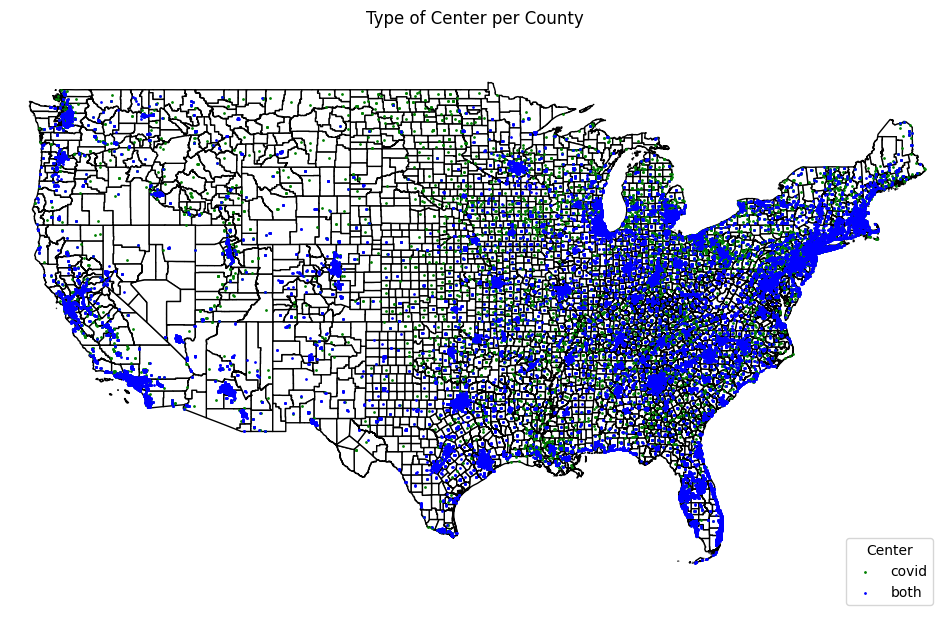

In [512]:
# plot flu, covid, both centers onto map

center_colors = {"covid": "green", "both": "blue"}

ax = us_map.plot(color="white", edgecolor="black", figsize=(12, 8))
for center, color in center_colors.items():
    centers[centers["center"] == center].plot(
        ax=ax, color=color, markersize=1, label=center
    )

ax.legend(title="Center", loc="lower right")
ax.set_title("Type of Center per County")
ax.set_axis_off()

ax.set_xlim([-126, -66])
ax.set_ylim([22, 52])


plt.show()